In [1]:
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import starmap
%matplotlib inline



In [2]:
url = "https://dl.dropboxusercontent.com/s/q9geru5vtmz5b55/vk.adjlist?dl=1"
with urllib.request.urlopen(url) as f:
    data = f.read().decode('utf-8')
with open('vk.adjlist', 'w') as f:
    f.write(data) 
    
G = nx.read_adjlist('vk.adjlist')
coord = nx.spring_layout(G, k = 0.15)

In [3]:
k = dict (G.degree ())
k2 = {key: value for key, value in k.items() if value > 0}
G2 = G.subgraph(list(k2.keys()))

In [4]:
# take only giant connected component for the further analysis: 
Gc = max(nx.connected_component_subgraphs(G), key=len)
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

Number of nodes - 2113
Number of edges - 25737


In [72]:
def get_patterns(graph, pattern, count = 5):
    V = graph.nodes()
    out = []
    for subV in itertools.combinations(V, len(pattern.nodes())):
        subG = nx.subgraph(graph, subV)
        if nx.is_isomorphic(subG, pattern):
            out.append(list(subG.nodes()))
            if len(out) >= count:
                break
    return out
    
def plot_subgraph(graph, subG):
    subG = nx.subgraph(graph, subG)
    nx.draw(subG, with_labels =True)
    plt.show()

## Пример 1

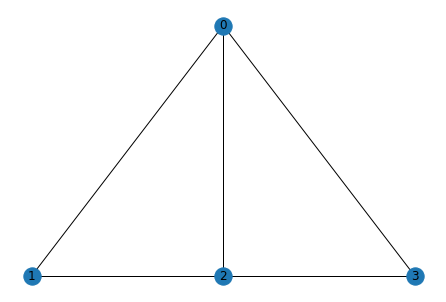

In [66]:
G_pattern = nx.cycle_graph(4)
G_pattern.add_edges_from([(0,2)])
nx.draw_spectral(G_pattern, with_labels =True)

[['VK_1756709', 'VK_7656877', 'VK_65606427', 'VK_9462843'], ['VK_1756709', 'VK_22698341', 'VK_11971162', 'VK_9462843'], ['VK_1756709', 'VK_26233510', 'VK_11971162', 'VK_9462843']]


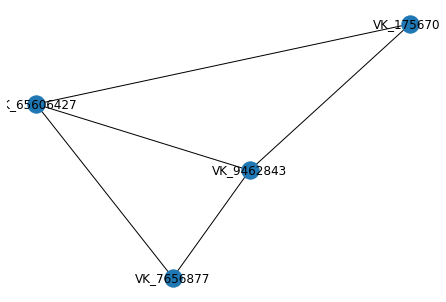

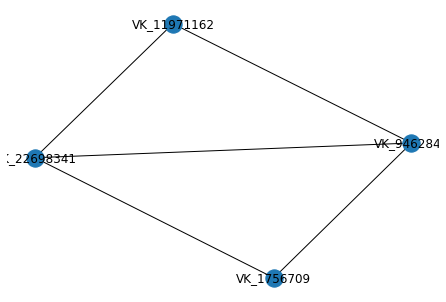

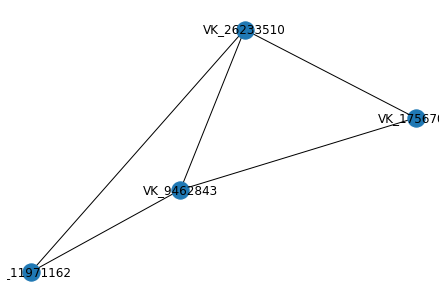

In [73]:
res = get_patterns(Gc, G_pattern, 3)
print(res)
for el in res:
    plot_subgraph(Gc, el)

## Пример 2

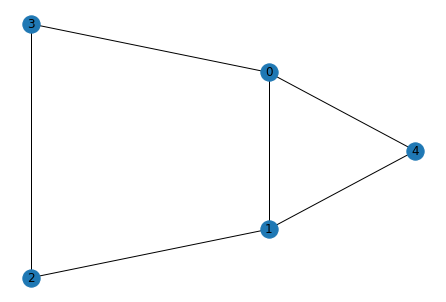

In [55]:
G_pattern2 = nx.cycle_graph(4)
G_pattern.add_node(4)
G_pattern2.add_edges_from([(0,4),(1,4)])
nx.draw_spectral(G_pattern2, with_labels =True)

[['VK_55297827', 'VK_10746007', 'VK_9462843', 'VK_7656877', 'VK_1756709'], ['VK_103179810', 'VK_9462843', 'VK_7656877', 'VK_75746246', 'VK_1756709'], ['VK_23268563', 'VK_9462843', 'VK_7656877', 'VK_75746246', 'VK_1756709']]


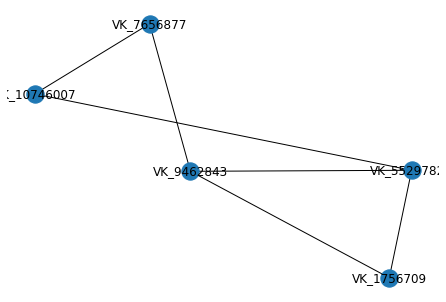

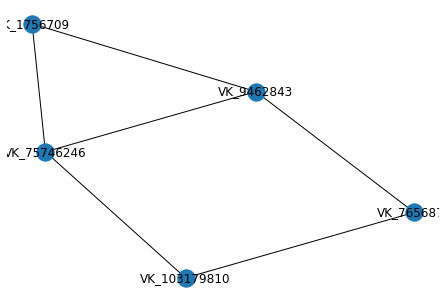

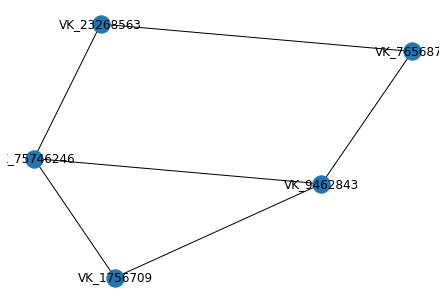

In [74]:
res = get_patterns(Gc, G_pattern2, 3)
print(res)
for el in res:
    plot_subgraph(Gc, el)

## Пример 3

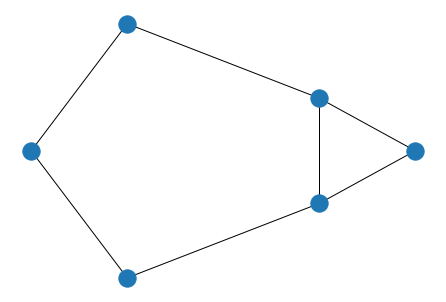

In [61]:
G_pattern3 = nx.cycle_graph(5)
G_pattern3.add_node(5)
G_pattern3.add_edges_from([(4,5), (3, 5)])
nx.draw_spectral(G_pattern3)

[['VK_55297827', 'VK_10746007', 'VK_9462843', 'VK_7656877', 'VK_1756709']]


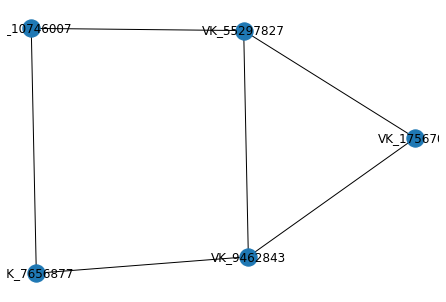

In [76]:
res = get_patterns(Gc, G_pattern2, 1)
print(res)
for el in res:
    plot_subgraph(Gc, el)

In [ ]:
res = get_patterns(Gc, G_pattern2, 3)
print(res)
for el in res:
    plot_subgraph(Gc, el)

## На примере маленького графа:

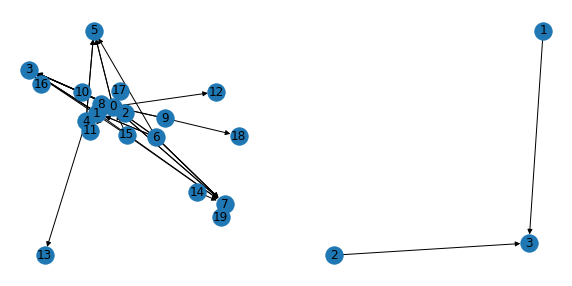

In [41]:
params = np.array([1.,5.,1.])
params /= np.sum(params)
G_test = nx.scale_free_graph(20, alpha=params[0], beta=params[1], gamma=params[2])
plt.figure(figsize=(10,5))
plt.subplot(121)
nx.draw_spring(G_test, with_labels =True)

motif = nx.DiGraph([ (1,3), (2,3)])
plt.subplot(122)
nx.draw(motif, with_labels =True)

In [42]:
V = G_test.nodes()
for subV in itertools.combinations(V, 3):
    subG = nx.subgraph(G_test, subV)
    if nx.is_isomorphic(subG, motif):
        print(subG.nodes())

[10, 3, 15]
[16, 10, 3]
[16, 3, 15]
[15, 14, 7]
[19, 14, 7]
[19, 15, 7]


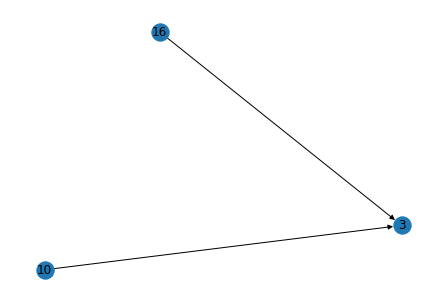

In [44]:
subG = nx.subgraph(G_test,[16, 10, 3])
nx.draw(subG, with_labels =True)